# 7장 시계열 데이터를 다뤄보자 

### 페이스북에서 만든 fbprophet이라는 모듈이다. 윈도우 유저는 Visual C++ Bulid Tools를 설치해야하고 그리고 터미널에서 pip install pystan 과 pip install prophet

In [58]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

ModuleNotFoundError: No module named 'fbprophet'

In [49]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [50]:

pinkwink_web = pd.read_csv('../data/08. PinkWink Web Traffic.csv', 
                                          encoding='utf-8', thousands=',',
                                          names = ['date','hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


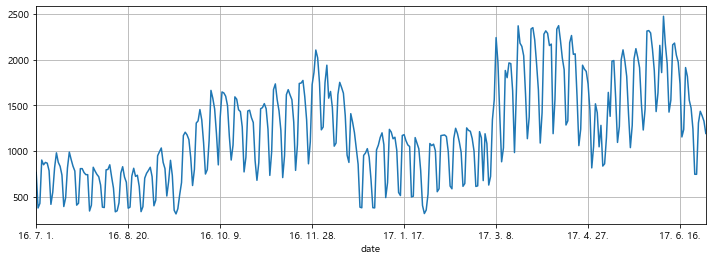

In [51]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True);

In [52]:
time = np.arange(0, len(pinkwink_web))
trafiic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)
time

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [53]:
trafiic

array([ 766.,  377.,  427.,  902.,  850.,  876.,  868.,  785.,  417.,
        550.,  818.,  981.,  877.,  833.,  737.,  393.,  489.,  817.,
        989.,  908.,  835.,  782.,  408.,  429.,  808.,  808.,  765.,
        742.,  742.,  344.,  408.,  823.,  781.,  745.,  719.,  629.,
        386.,  382.,  795.,  799.,  850.,  717.,  595.,  335.,  346.,
        433.,  759.,  829.,  716.,  659.,  375.,  386.,  727.,  812.,
        723.,  736.,  613.,  337.,  391.,  704.,  757.,  788.,  823.,
        721.,  401.,  463.,  948.,  993., 1034.,  877.,  808.,  508.,
        669.,  899.,  732.,  352.,  312.,  369.,  522.,  655., 1170.,
       1207., 1178., 1126.,  929.,  623.,  799., 1307., 1331., 1455.,
       1342., 1090.,  749.,  797., 1117., 1665., 1579., 1461., 1188.,
        849., 1364., 1648., 1637., 1601., 1499., 1159.,  902., 1066.,
       1594., 1568., 1453., 1433., 1265.,  772.,  932., 1439., 1448.,
       1367., 1313.,  895.,  680.,  872., 1464., 1476., 1520., 1464.,
       1239.,  734.,

In [54]:
fx

array([  0.        ,   0.36436436,   0.72872873,   1.09309309,
         1.45745746,   1.82182182,   2.18618619,   2.55055055,
         2.91491491,   3.27927928,   3.64364364,   4.00800801,
         4.37237237,   4.73673674,   5.1011011 ,   5.46546547,
         5.82982983,   6.19419419,   6.55855856,   6.92292292,
         7.28728729,   7.65165165,   8.01601602,   8.38038038,
         8.74474474,   9.10910911,   9.47347347,   9.83783784,
        10.2022022 ,  10.56656657,  10.93093093,  11.2952953 ,
        11.65965966,  12.02402402,  12.38838839,  12.75275275,
        13.11711712,  13.48148148,  13.84584585,  14.21021021,
        14.57457457,  14.93893894,  15.3033033 ,  15.66766767,
        16.03203203,  16.3963964 ,  16.76076076,  17.12512513,
        17.48948949,  17.85385385,  18.21821822,  18.58258258,
        18.94694695,  19.31131131,  19.67567568,  20.04004004,
        20.4044044 ,  20.76876877,  21.13313313,  21.4974975 ,
        21.86186186,  22.22622623,  22.59059059,  22.95

In [28]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [39]:
fp1 = np.polyfit(time, trafiic, 1)
f1 = np.poly1d(fp1)

fp2 = np.polyfit(time, trafiic, 2)
f2 = np.poly1d(fp2)

fp3 = np.polyfit(time, trafiic, 3)
f3 = np.poly1d(fp3)

fp15 = np.polyfit(time, trafiic, 15)
f15 = np.poly1d(fp15)

print(error(f1, time, trafiic))
print(error(f2, time, trafiic))
print(error(f3, time, trafiic))
print(error(f15, time, trafiic))


430.85973081109626
430.6284101894695
429.53280466762925
330.4777304274343


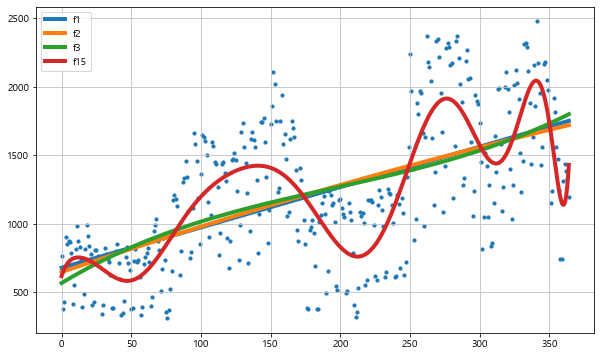

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(time, trafiic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')
plt.legend(loc=2)
plt.show()

In [41]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['data']

m = Prophet(yearly_seasonality=True)
m.fit(df);

KeyError: 'data'